In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
features = ['sepal length','sepal width','petal length','petal width']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load Data into pandas library
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# Separating Features
x = df.loc[:, features].values
y = df.loc[:,['target']].values
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
finalDf = pd.concat([principalDf, df['target']], axis= 1)
print(finalDf.head())

        PC1       PC2       target
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa


AttributeError: 'AxesSubplot' object has no attribute 'show'

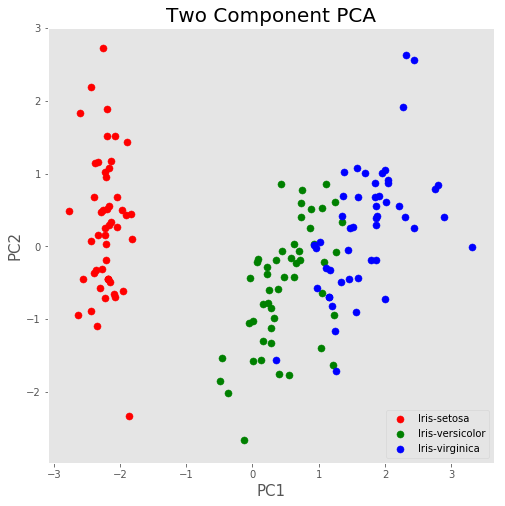

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title("Two Component PCA", fontsize=20)

targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target']==target
    ax.scatter(finalDf.loc[indicesToKeep,'PC1'], finalDf.loc[indicesToKeep,'PC2'],
               c=color, s=50)

ax.legend(targets)
ax.grid()
ax.show()